Талавер Олег ПІ-60[2]
Репозиторій: https://gitlab.com/bachelors2022/pi-60/talaver-oleg/other/ai.git

# Виведення середнього значення та стандартного відхилення

## Попередня обробка даних

In [51]:
import numpy as np
from sklearn import preprocessing

# input_data = np.array([[5.1, -2.9, 3.3],
#                        [-1.2, 7.8, -6.1],
#                        [3.9, 0.4, 2.1],
#                        [7.3, -9.9, -4.5]])
# binarization_threshold = 2.1

# Second task (16th)
input_data = np.array([[-3.3, -1.6, 6.1],
                       [2.4, -1.2, 4.3],
                       [-3.2, 5.5, -6.1],
                       [-4.4, 1.4, -1.2]])
binarization_threshold = 2.1

### Бінарізація

In [52]:
# Бінаризація даних
data_binarized = preprocessing.Binarizer(threshold=binarization_threshold).transform(input_data)
print("\n Binarized data:\n", data_binarized)


 Binarized data:
 [[0. 0. 1.]
 [1. 0. 1.]
 [0. 1. 0.]
 [0. 0. 0.]]


### Виключення середнього

In [53]:
# Виведення середнього значення та стандартного відхилення
print("\nBEFORE: ")
print("Mean =", input_data.mean(axis=0))
print("Std deviation =", input_data.std(axis=0))


BEFORE: 
Mean = [-2.125  1.025  0.775]
Std deviation = [2.65459507 2.82875856 4.79446295]


In [54]:
# Исключение среднего
data_scaled = preprocessing.scale(input_data)
print("\nAFTER: ")
print("Mean =", data_scaled.mean(axis=0))
print("Std deviation =", data_scaled.std(axis=0))


AFTER: 
Mean = [ 2.77555756e-17 -5.55111512e-17  6.93889390e-17]
Std deviation = [1. 1. 1.]


### Масштабуванн

In [55]:
# Масштабування MinМax
data_scaler_minmax = preprocessing.MinMaxScaler(feature_range=(0, 1))
data_scaled_minmax = data_scaler_minmax.fit_transform(input_data)
print("\nМin max scaled data:\n", data_scaled_minmax)


Мin max scaled data:
 [[0.16176471 0.         1.        ]
 [1.         0.05633803 0.85245902]
 [0.17647059 1.         0.        ]
 [0.         0.42253521 0.40163934]]


### Номалізація

In [56]:
data_normalized_l1 = preprocessing.normalize(input_data, norm='l1')
data_normalized_l2 = preprocessing.normalize(input_data, norm='l2')
print("\nl1 normalized data:\n", data_normalized_l1)
print("\nl2 normalized data:\n", data_normalized_l2)


l1 normalized data:
 [[-0.3        -0.14545455  0.55454545]
 [ 0.30379747 -0.15189873  0.5443038 ]
 [-0.21621622  0.37162162 -0.41216216]
 [-0.62857143  0.2        -0.17142857]]

l2 normalized data:
 [[-0.46364048 -0.22479538  0.8570324 ]
 [ 0.47351004 -0.23675502  0.84837215]
 [-0.36302745  0.62395344 -0.69202108]
 [-0.92228798  0.29345527 -0.25153308]]


In [57]:
# Надання позначок вхідних даних
input_labels = ['red', 'Ыасk', 'red', 'green', 'Ьlack', 'yellow', 'white']
# Створення кодувальника та встановлення відповідності
# між мітками та числами
encoder = preprocessing.LabelEncoder()
encoder.fit(input_labels)
# Виведення відображення
print("\nLabel mapping:")
for i, item in enumerate(encoder.classes_):
    print(item, '-->', i)
# перетворення міток за допомогою кодувальника
test_labels = ['green', 'red', 'Ыасk']
encoded_values = encoder.transform(test_labels)
print("\nLabels =", test_labels)
print("Encoded values =", list (encoded_values))
# Декодування набору чисел за допомогою декодера
encoded_values = [3, 0, 4, 1]
decoded_list = encoder.inverse_transform(encoded_values)
print("\nEncoded values =", encoded_values)
print("Decoded labels =", list (decoded_list ) )


Label mapping:
green --> 0
red --> 1
white --> 2
yellow --> 3
Ыасk --> 4
Ьlack --> 5

Labels = ['green', 'red', 'Ыасk']
Encoded values = [0, 1, 4]

Encoded values = [3, 0, 4, 1]
Decoded labels = ['yellow', 'green', 'Ыасk', 'red']


## Класифікація логістичною регресією або логістичний класифікатор

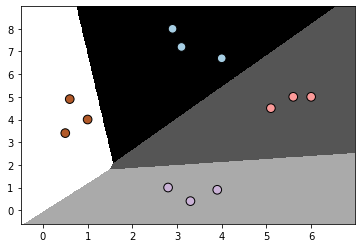

In [58]:
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
from utilities import visualize_classifier

X = np.array([[3.1, 7.2], [4, 6.7], [2.9, 8], [5.1, 4.5],
 [6, 5], [5.6, 5], [3.3, 0.4], 
 [3.9, 0.9], [2.8, 1],
 [0.5, 3.4], [1, 4], [0.6, 4.9]])
y = np.array([0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3])

# Створення логістичного класифікатора
classifier = linear_model.LogisticRegression(solver='liblinear',C=1)
# Тренування класифікатора
classifier.fit(X, y)
visualize_classifier(classifier, X, y)

## Класифікація наївним байєсовським класифікатором

Accuracy of Naive Bayes classifier = 99.75 %


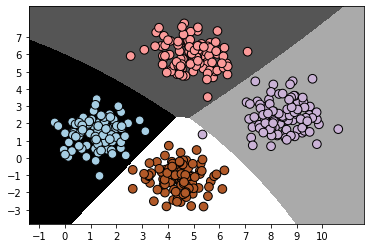

In [59]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, cross_val_score
from utilities import visualize_classifier

# Вхідний файл, який містить дані
input_file = 'data_multivar_nb.txt'

# Завантаження даних із вхідного файлу
data = np.loadtxt(input_file, delimiter=',')
X, y = data[:, :-1], data[:, -1]

# Створення наївного байєсовського класифікатора
classifier = GaussianNB()

# Тренування класифікатора
classifier.fit(X, y)

# Прогнозування значень для тренувальних даних
y_pred = classifier.predict(X)

# Обчислення якості класифікатора
accuracy = 100.0 * (y == y_pred).sum() / X.shape[0]
print("Accuracy of Naive Bayes classifier =", round(accuracy, 2), "%")

# Візуалізація результатів роботи класифікатора
visualize_classifier(classifier, X, y)

Accuracy of the new classifier = 100.0 %


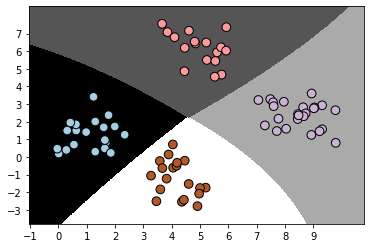

In [60]:
# Розбивка даних на навчальний та тестовий набори
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)
classifier_new = GaussianNB()
classifier_new.fit(X_train, y_train)
y_test_pred = classifier_new.predict(X_test)

# Обчислення якості класифікатора
accuracy = 100.0 * (y_test == y_test_pred).sum() / X_test.shape[0]
print("Accuracy of the new classifier =", round(accuracy, 2), "%")
# Візуалізація роботи класифікатора
visualize_classifier(classifier_new, X_test, y_test)

In [61]:
num_folds = 3

accuracy_values = cross_val_score(classifier, X, y, scoring='accuracy', cv=num_folds)
print("Accuracy: " + str(round(100 * accuracy_values.mean(), 2)) + "%")
precision_values = cross_val_score(classifier, X, y, scoring='precision_weighted', cv=num_folds)
print("Precision: " + str(round(100 * precision_values.mean(), 2)) + "%")
recall_values = cross_val_score(classifier, X, y, scoring='recall_weighted', cv=num_folds)
print("Recall: " + str(round(100 * recall_values.mean(), 2)) + "%")
f1_values = cross_val_score(classifier, X, y, scoring='f1_weighted', cv=num_folds)
print("F1: " + str(round(100 * f1_values.mean(), 2)) + "%")

Accuracy: 99.75%
Precision: 99.76%
Recall: 99.75%
F1: 99.75%


Висновки: поділивши вибірку на тестову та тренувальну ми змогли протестувати
алгоритм на пузбулися можливого перенавчання. Метрики акуратності, точності,
повноти та F міри показують достатньо сприйнятний результат і кажуть що у нас
немає перехилень в сторону повноти чи точності, що є добре

## Вивчити метрики якості класифікації
### Матриця помилок (confusion_matrix)


In [62]:
import pandas as pd
import numpy as np

df = pd.read_csv('data_metrics.csv')
df.head()

,actual_label,model_RF,model_LR
0,1,0.639816,0.531904
1,0,0.490993,0.414496
2,1,0.623815,0.569883
3,1,0.506616,0.443674
4,0,0.418302,0.369532


In [63]:
thresh = 0.5
df['predicted_RF'] = (df.model_RF >= 0.5).astype('int')
df['predicted_LR'] = (df.model_LR >= 0.5).astype('int')
df.head()

,actual_label,model_RF,model_LR,predicted_RF,predicted_LR
0,1,0.639816,0.531904,1,1
1,0,0.490993,0.414496,0,0
2,1,0.623815,0.569883,1,1
3,1,0.506616,0.443674,1,0
4,0,0.418302,0.369532,0,0


In [64]:
from sklearn.metrics import confusion_matrix
confusion_matrix(df.actual_label.values, df.predicted_RF.values)

array([[5519, 2360],
       [2832, 5047]], dtype=int64)

In [65]:
def talavero_confusion_matrix(y_true, y_pred):
    TP,FN,FP,TN = find_conf_matrix_values(y_true, y_pred)
    return np.array([ [ TN, FP ], [ FN, TP ] ])

def find_conf_matrix_values(y_true, y_pred):
    TP = 0
    FN = 0
    FP = 0
    TN = 0
    for i in range(len(y_true)):
        TP += find_TP(y_true[i], y_pred[i]) 
        FN += find_FN(y_true[i], y_pred[i]) 
        FP += find_FP(y_true[i], y_pred[i]) 
        TN += find_TN(y_true[i], y_pred[i]) 

    return TP,FN,FP,TN

def find_TP(y_true, y_pred):
 return 1 if y_true == 1 and y_pred == 1 else 0

def find_FN(y_true, y_pred):
 return 1 if y_true == 1 and y_pred == 0 else 0

def find_FP(y_true, y_pred):
 return 1 if y_true == 0 and y_pred == 1 else 0

def find_TN(y_true, y_pred):
 return 1 if y_true == 0 and y_pred == 0 else 0


In [66]:

assert np.array_equal(talavero_confusion_matrix(df.actual_label.values, df.predicted_RF.values), confusion_matrix(df.actual_label.values, df.predicted_RF.values), "is not correct for RF'assert")

assert np.array_equal(talavero_confusion_matrix(df.actual_label.values, df.predicted_LR.values), confusion_matrix(df.actual_label.values, df.predicted_LR.values), "is not correct for LR'assert")

### accuracy_score

In [67]:
from sklearn.metrics import accuracy_score
accuracy_score(df.actual_label.values, df.predicted_RF.values)

0.6705165630156111

In [68]:
def talavero_accuracy_score(y_true, y_pred):
 # calculates the fraction of samples
 TP,FN,FP,TN = find_conf_matrix_values(y_true,y_pred)
 return (TP + TN) / (TP+TN+FP+FN)

assert talavero_accuracy_score(df.actual_label.values,  df.predicted_RF.values) == accuracy_score(df.actual_label.values, df.predicted_RF.values), 'failed on RF'
assert talavero_accuracy_score(df.actual_label.values, df.predicted_LR.values) == accuracy_score(df.actual_label.values, df.predicted_LR.values), 'failed on LR'

print('Accuracy RF: %.3f'%(talavero_accuracy_score(df.actual_label.values, df.predicted_RF.values)))
print('Accuracy LR: %.3f'%(talavero_accuracy_score(df.actual_label.values, df.predicted_LR.values)))

Accuracy RF: 0.671
Accuracy LR: 0.616


### recall_score

In [69]:
from sklearn.metrics import recall_score
recall_score(df.actual_label.values, df.predicted_RF.values)

0.6405635232897576

In [70]:
def talavero_recall_score(y_true, y_pred):
 # calculates the fraction of positive samples predicted correctly
 TP,FN,FP,TN = find_conf_matrix_values(y_true,y_pred)
 return TP / (TP + FN) 
assert talavero_recall_score(df.actual_label.values, df.predicted_RF.values) == recall_score(df.actual_label.values, df.predicted_RF.values), 'failed on RF'
assert talavero_recall_score(df.actual_label.values, df.predicted_LR.values) == recall_score(df.actual_label.values, df.predicted_LR.values), 'failed on LR'

print('Recall RF: %.3f'%(talavero_recall_score(df.actual_label.values, df.predicted_RF.values)))
print('Recall LR: %.3f'%(talavero_recall_score(df.actual_label.values, df.predicted_LR.values)))

Recall RF: 0.641
Recall LR: 0.543


### precision_score

In [71]:
from sklearn.metrics import precision_score
precision_score(df.actual_label.values, df.predicted_RF.values)

0.681382476036182

In [72]:
def talavero_precision_score(y_true, y_pred):
 # calculates the fraction of predicted positives samples that are actually positive
 TP,FN,FP,TN = find_conf_matrix_values(y_true,y_pred)
 return TP / (TP+FP)

assert talavero_precision_score(df.actual_label.values, df.predicted_RF.values) == precision_score(df.actual_label.values, df.predicted_RF.values), 'failed on RF'
assert talavero_precision_score(df.actual_label.values, df.predicted_LR.values) == precision_score(df.actual_label.values, df.predicted_LR.values), 'failed on LR'

print('Precision RF: %.3f'%(talavero_precision_score(df.actual_label.values, df.predicted_RF.values)))
print('Precision LR: %.3f'%(talavero_precision_score(df.actual_label.values, df.predicted_LR.values)))

Precision RF: 0.681
Precision LR: 0.636


### f1_score

In [73]:
from sklearn.metrics import f1_score
f1_score(df.actual_label.values, df.predicted_RF.values)

0.660342797330891

In [74]:
def talavero_f1_score(y_true, y_pred):
 # calculates the F1 score
 recall = talavero_recall_score(y_true,y_pred)
 precision = talavero_precision_score(y_true,y_pred)
 return 2 * (precision * recall) / (precision + recall)

assert talavero_f1_score(df.actual_label.values, df.predicted_RF.values) == f1_score(df.actual_label.values, df.predicted_RF.values), 'failed on RF'
assert talavero_f1_score(df.actual_label.values, df.predicted_LR.values) == f1_score(df.actual_label.values, df.predicted_LR.values), 'failed on LR'

print('F1 RF: %.3f'%(talavero_f1_score(df.actual_label.values, df.predicted_RF.values)))
print('F1 LR: %.3f'%(talavero_f1_score(df.actual_label.values, df.predicted_LR.values)))

F1 RF: 0.660
F1 LR: 0.586


In [75]:
print('scores with threshold = 0.5')
print('Accuracy RF: %.3f'%(talavero_accuracy_score(df.actual_label.values, df.predicted_RF.values)))
print('Recall RF: %.3f'%(talavero_recall_score(df.actual_label.values, df.predicted_RF.values)))
print('Precision RF: %.3f'%(talavero_precision_score(df.actual_label.values, df.predicted_RF.values)))
print('F1 RF: %.3f'%(talavero_f1_score(df.actual_label.values, df.predicted_RF.values)))
print('')
print('scores with threshold = 0.25')
print('Accuracy RF: %.3f'%(talavero_accuracy_score(df.actual_label.values, (df.model_RF >= 0.25).astype('int').values)))
print('Recall RF: %.3f'%(talavero_recall_score(df.actual_label.values, (df.model_RF >= 0.25).astype('int').values)))
print('Precision RF: %.3f'%(talavero_precision_score(df.actual_label.values, (df.model_RF >= 0.25).astype('int').values)))
print('F1 RF: %.3f'%(talavero_f1_score(df.actual_label.values, (df.model_RF >= 0.25).astype('int').values)))

scores with threshold = 0.5
Accuracy RF: 0.671
Recall RF: 0.641
Precision RF: 0.681
F1 RF: 0.660

scores with threshold = 0.25
Accuracy RF: 0.502
Recall RF: 1.000
Precision RF: 0.501
F1 RF: 0.668


Висновки: маніпулючи значенням threshold ми можемо отримати більш точніші
результати певного алгоритма. У даному випадку, понизивши цю змінну, ми почали
враховувати більшу к-ть результатів як позитивну, що вплинуло на метрики. З
новим значенням значення повноти дорівнює 1, що каже про розпізнання алгоритмом
усіх позитивних значень. При цьому показники точності та акуратності дещо впали,
адже тепер, ми рахуємо деякі насправді негативні результати як позитивні, але
загалом за F метрикою ми бачимо що точність збільшилася.

### roc_curve та roc_auc_score

In [76]:
from sklearn.metrics import roc_curve
fpr_RF, tpr_RF, thresholds_RF = roc_curve(df.actual_label.values, df.model_RF.values) 
fpr_LR, tpr_LR, thresholds_LR = roc_curve(df.actual_label.values, df.model_LR.values)

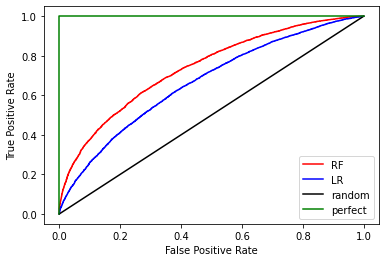

In [77]:
import matplotlib.pyplot as plt

plt.plot(fpr_RF, tpr_RF,'r-',label = 'RF')
plt.plot(fpr_LR,tpr_LR,'b-', label= 'LR')
plt.plot([0,1],[0,1],'k-',label='random')
plt.plot([0,0,1,1],[0,1,1,1],'g-',label='perfect')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()


In [78]:
from sklearn.metrics import roc_auc_score
auc_RF = roc_auc_score(df.actual_label.values, df.model_RF.values)
auc_LR = roc_auc_score(df.actual_label.values, df.model_LR.values)
print('AUC RF:%.3f'% auc_RF)
print('AUC LR:%.3f'% auc_LR)

AUC RF:0.738
AUC LR:0.666


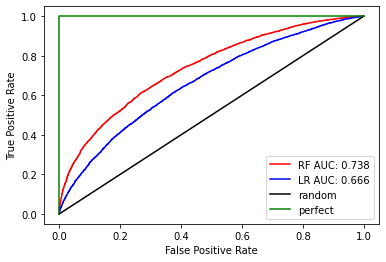

In [79]:
import matplotlib.pyplot as plt
plt.plot(fpr_RF, tpr_RF,'r-',label = 'RF AUC: %.3f'%auc_RF)
plt.plot(fpr_LR,tpr_LR,'b-', label= 'LR AUC: %.3f'%auc_LR)
plt.plot([0,1],[0,1],'k-',label='random')
plt.plot([0,0,1,1],[0,1,1,1],'g-',label='perfect')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()


Висновки: відповідно до діаграми, модель RF є кращою, адже має більшу площу
поверхні між кривою та прямою нетренерованої моделі.

## Самостійна робота

Розробіть програму класифікації даних в файлі data_multivar_nb.txt за допомогою
машини опорних векторів (Support Vector Machine - SVМ). Розрахуйте показники
якості класифікації. Порівняйте їх з показниками наївного байєсівського
класифікатора. Зробіть висновки яку модель класифікації краще обрати і чом

Accuracy of the new classifier = 100.0 %


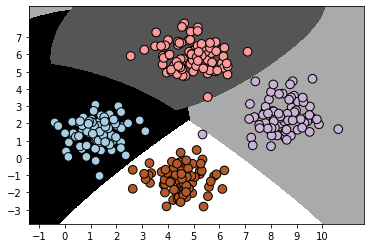

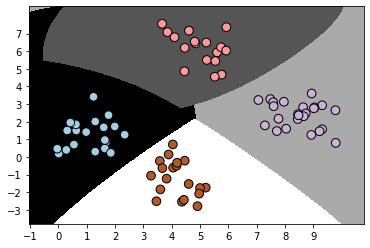

In [80]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split, cross_val_score
from utilities import visualize_classifier

# Вхідний файл, який містить дані
input_file = 'data_multivar_nb.txt'

# Завантаження даних із вхідного файлу
data = np.loadtxt(input_file, delimiter=',')
X, y = data[:, :-1], data[:, -1]

# Розбивка даних на навчальний та тестовий набори
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)
classifier = svm.SVC()
classifier.fit(X_train, y_train)
y_test_pred = classifier.predict(X_test)

# Обчислення якості класифікатора
accuracy = 100.0 * (y_test == y_test_pred).sum() / X_test.shape[0]
print("Accuracy of the new classifier =", round(accuracy, 2), "%")
# Візуалізація роботи класифікатора
visualize_classifier(classifier, X_train, y_train)
visualize_classifier(classifier, X_test, y_test)

In [81]:

num_folds = 3

accuracy_values = cross_val_score(classifier, X, y, scoring='accuracy', cv=num_folds)
print("Accuracy: " + str(round(100 * accuracy_values.mean(), 2)) + "%")
precision_values = cross_val_score(classifier, X, y, scoring='precision_weighted', cv=num_folds)
print("Precision: " + str(round(100 * precision_values.mean(), 2)) + "%")
recall_values = cross_val_score(classifier, X, y, scoring='recall_weighted', cv=num_folds)
print("Recall: " + str(round(100 * recall_values.mean(), 2)) + "%")
f1_values = cross_val_score(classifier, X, y, scoring='f1_weighted', cv=num_folds)
print("F1: " + str(round(100 * f1_values.mean(), 2)) + "%")

Accuracy: 99.75%
Precision: 99.76%
Recall: 99.75%
F1: 99.75%


Висновки: у порівнянні з наївним баясом, модель що базується на SCV змогла краще відокрмеити ознаки, про що свідчить і метрики, що є збалансованими